<a href="https://colab.research.google.com/github/AlinaOtr/data/blob/master/reaction_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
Имеются данные по обработке заявок на консультацию телемаркетинга по заполнению анкеты за определенный период. У каждой заявки есть время её поступления, время взятия заявки оператором. В подразделении отслеживается показатель времени реакции по заявке (насколько быстро телемаркетинг перезванивает клиенту). Целевой уровень реакции – 5 минут.  
Каково среднее время реакции для выбранного периода?  
Как бы вы оценили выполнение показателя целевого времени реакции: выполняется или нет и почему?  
Какое значение времени реакции лучше использовать для дальнейшего анализа и моделирования процессов подразделения?

In [17]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
url='https://drive.google.com/file/d/1IQNgSyexlJWkZ1DVci2v-zz0OmU21qaS/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep = ';', encoding = 'Windows-1251')

In [19]:
df.head()

,День,Поступление,Взятие
0,01.12.2021,01.12.2021 10:07,01.12.2021 10:22
1,01.12.2021,01.12.2021 12:19,01.12.2021 14:04
2,01.12.2021,01.12.2021 8:50,01.12.2021 8:56
3,01.12.2021,01.12.2021 10:34,01.12.2021 10:37
4,01.12.2021,01.12.2021 9:32,01.12.2021 9:40


In [34]:
df.isna().sum()

date               0
time_receipt       0
time_acceptance    0
reaction           0
dtype: int64

Пропусков в таблице нет.  
Переименую столбцы:

In [21]:
new_names = ['date', 'time_receipt', 'time_acceptance']
df.set_axis(new_names, axis = 'columns', inplace = True)

In [22]:
df.duplicated().sum()

0

Дубликатов в таблице нет.

In [23]:
def string_to_date(string):
  return datetime.datetime.strptime(string, "%d.%m.%Y %H:%M")

In [24]:
df.time_receipt = df.time_receipt.apply(string_to_date)

In [25]:
df.time_acceptance = df.time_acceptance.apply(string_to_date)

In [27]:
df['reaction'] = df.time_acceptance - df.time_receipt

In [38]:
df['reaction_min'] = df.reaction.dt.total_seconds().div(60).astype(int)

In [39]:
df.head()

,date,time_receipt,time_acceptance,reaction,reaction_min
0,01.12.2021,2021-12-01 10:07:00,2021-12-01 10:22:00,0 days 00:15:00,15
1,01.12.2021,2021-12-01 12:19:00,2021-12-01 14:04:00,0 days 01:45:00,105
2,01.12.2021,2021-12-01 08:50:00,2021-12-01 08:56:00,0 days 00:06:00,6
3,01.12.2021,2021-12-01 10:34:00,2021-12-01 10:37:00,0 days 00:03:00,3
4,01.12.2021,2021-12-01 09:32:00,2021-12-01 09:40:00,0 days 00:08:00,8


In [41]:
df.reaction_min.describe()

count      50.00000
mean      141.80000
std       566.19525
min         0.00000
25%         8.00000
50%        18.00000
75%        46.25000
max      2889.00000
Name: reaction_min, dtype: float64

In [45]:
2889/60

48.15

**Среднее время реакции составляет 141,8 минуты.** При этом медиана составляет всего 18 минут - виден перекос. Сразу бросается в глаза максимальное время реакции - 2889 минуты, что равняется 48,15 часам, а это более двух суток, что очень долго для обработки заявки (тем более что целевой уровень реакции 5 минут).Но судя по всему таких значений очень мало. **Нужно разобраться, что это за выбросы и из-за чего они появились в выборке?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


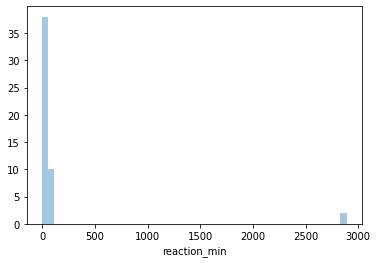

In [40]:
sns.distplot(df.reaction_min, kde=False)

In [48]:
df.query('reaction_min > 120')

,date,time_receipt,time_acceptance,reaction,reaction_min
25,01.12.2021,2021-12-01 10:00:00,2021-12-03 10:00:00,2 days 00:00:00,2880
41,01.12.2021,2021-12-01 08:37:00,2021-12-03 08:46:00,2 days 00:09:00,2889


Предположу, что имеют место ошибки в дате взятия заявки: 3 декабря вместо 1 декабря. Можно либо выкинуть эти строки из выборки, либо исправить значения. Поскольку данных и так немного (50 строк), то исправлю и включу в выборку.

In [61]:
60*24

1440

В двух сутках 2880 минут

In [62]:
df['reaction_min_correct'] = df.reaction_min % 1440

In [64]:
df.head()

,date,time_receipt,time_acceptance,reaction,reaction_min,reaction_min_correct
0,01.12.2021,2021-12-01 10:07:00,2021-12-01 10:22:00,0 days 00:15:00,15,15
1,01.12.2021,2021-12-01 12:19:00,2021-12-01 14:04:00,0 days 01:45:00,105,105
2,01.12.2021,2021-12-01 08:50:00,2021-12-01 08:56:00,0 days 00:06:00,6,6
3,01.12.2021,2021-12-01 10:34:00,2021-12-01 10:37:00,0 days 00:03:00,3,3
4,01.12.2021,2021-12-01 09:32:00,2021-12-01 09:40:00,0 days 00:08:00,8,8


In [55]:
df.reaction_min_correct.describe()

count     50.000000
mean      26.600000
std       27.708394
min        0.000000
25%        7.250000
50%       16.000000
75%       37.750000
max      105.000000
Name: reaction_min_correct, dtype: float64

Теперь **среднее время реакции составляет 26,6 минуты**. Это всё равно значительно больше 5 минут.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


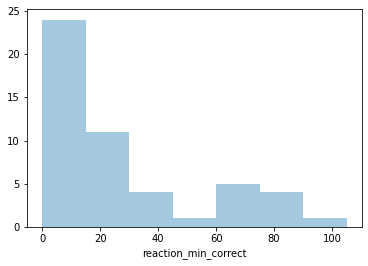

In [56]:
sns.distplot(df.reaction_min_correct, kde=False)

По данным видно, что **целевое время реакции (5 минут) не выполняется**. Половина заявок обрабатывается больше 16 минут, что примерно в 3 раза превышает заданное целевое значение. В некоторых случаях телемаркетинг перезванивает клиенту спустя час и более. Может это обеденное или вечернее время?

In [57]:
df.query('reaction_min_correct > 60')

,date,time_receipt,time_acceptance,reaction,reaction_min,reaction_min_correct
1,01.12.2021,2021-12-01 12:19:00,2021-12-01 14:04:00,0 days 01:45:00,105,105
7,01.12.2021,2021-12-01 07:09:00,2021-12-01 08:25:00,0 days 01:16:00,76,76
16,01.12.2021,2021-12-01 12:44:00,2021-12-01 14:06:00,0 days 01:22:00,82,82
19,01.12.2021,2021-12-01 07:10:00,2021-12-01 08:26:00,0 days 01:16:00,76,76
23,01.12.2021,2021-12-01 10:34:00,2021-12-01 11:48:00,0 days 01:14:00,74,74
29,01.12.2021,2021-12-01 08:45:00,2021-12-01 09:54:00,0 days 01:09:00,69,69
30,01.12.2021,2021-12-01 05:26:00,2021-12-01 06:28:00,0 days 01:02:00,62,62
43,01.12.2021,2021-12-01 12:32:00,2021-12-01 13:59:00,0 days 01:27:00,87,87


Гипотеза не подтвердилась. В трёх случаях долго обрабатываемые заявки действительно приходили в обеденное время (с 12 до часу), но в список также попали утренние заявки. Кажется, с этими случаями нужно разобраться отдельно, выявить причину, понаблюдать за данными в следующие дни.  
Пока для выбора нового целевого значения для дальнейшего анализа и моделирования процессов я предлагаю отобрать данные по заявкам. которые обрабатывались меньше часа, и посчитать среднее по ним.

In [59]:
df.query('reaction_min_correct < 60').reaction_min_correct.mean()

14.475

**Новое целевое значение 15 минут.**